# EDA

- Histograms sanity check
- Representatives from each group
- Aggregation of the data by Ilan's lab
  - See if improves reprentatives
- Heirechical Clustering
- Supervised classification

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from preprocessing import *
from config import *

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load data

In [3]:
y = np.load(r'data_files\labels_All32.npy')
y.shape

(4600,)

In [4]:
x = np.load(r'data_files\features_All32.npy')
x.shape

(4600, 32, 5)

In [5]:
x_re = x.reshape(-1, x.shape[-1])
x_re.shape

(147200, 5)

## Histograms

### Latitude, Longtitude

<AxesSubplot:>

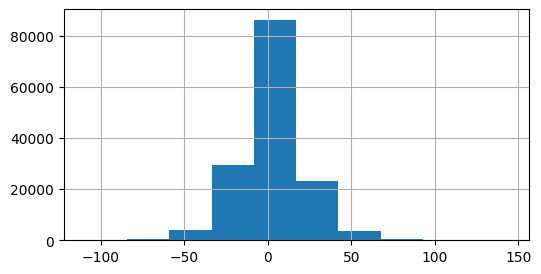

In [44]:
pd.Series(x_re[:,0]).hist(figsize = (6,3))

<AxesSubplot:>

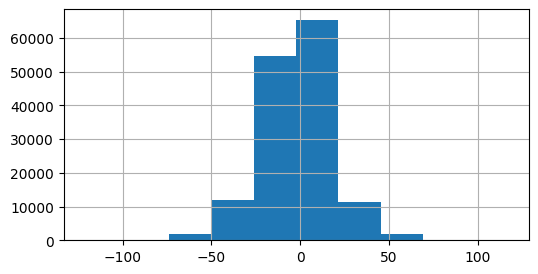

In [45]:
pd.Series(x_re[:,1]).hist(figsize = (6,3))

### Area

<AxesSubplot:>

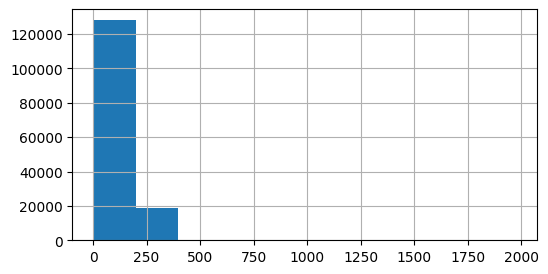

In [46]:
pd.Series(x_re[:,2]).hist(figsize = (6,3))

In [27]:
pd.Series(x_re[:,2]).describe()

count    147200.000000
mean        150.136902
std          52.307520
min           2.000000
25%         117.000000
50%         140.000000
75%         172.000000
max        1977.000000
dtype: float64

### Major Axis, Minor Axis

<AxesSubplot:>

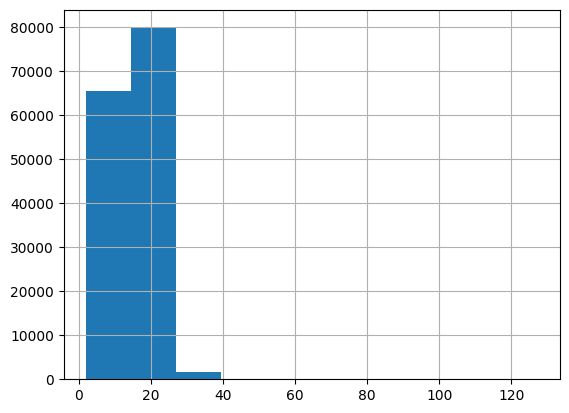

In [22]:
pd.Series(x_re[:,3]).hist()

<AxesSubplot:>

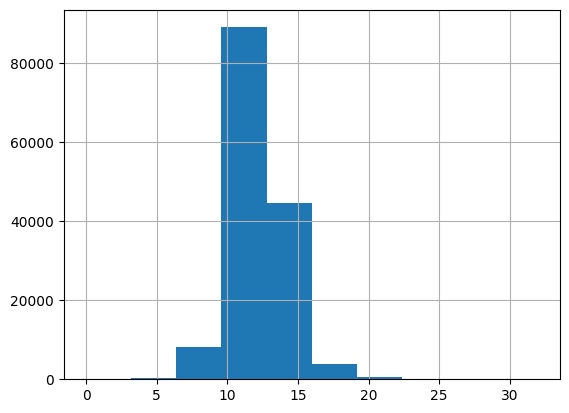

In [23]:
pd.Series(x_re[:,4]).hist()

## Normalize

In [6]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x.reshape(-1, x.shape[-1])).reshape(x.shape)

In [8]:
no_outliers_idx = idx_no_outliers_after_norm(x_norm)
x_norm_no_out = x_norm[no_outliers_idx]

In [142]:
x_norm_no_out_re = x_norm_no_out.reshape(-1, x_norm_no_out.shape[-1])
x_norm_no_out_re.shape

(145952, 5)

<AxesSubplot:>

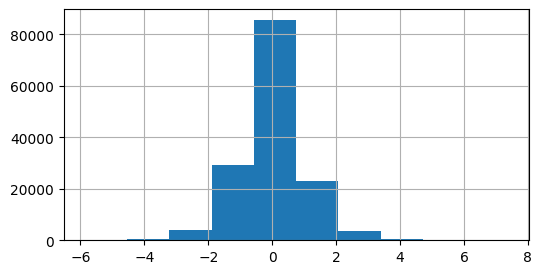

In [143]:
pd.Series(x_norm_no_out_re[:,0]).hist(figsize = (6,3))

<AxesSubplot:>

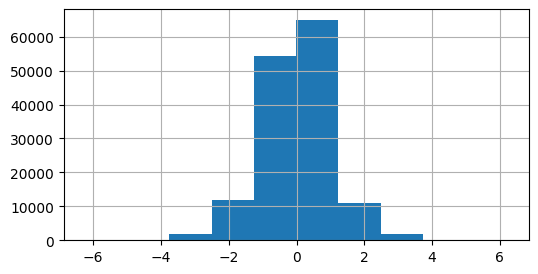

In [144]:
pd.Series(x_norm_no_out_re[:,1]).hist(figsize = (6,3))

<AxesSubplot:>

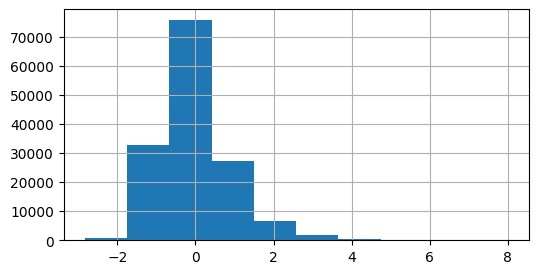

In [146]:
pd.Series(x_norm_no_out_re[:,2]).hist(figsize = (6,3))

<AxesSubplot:>

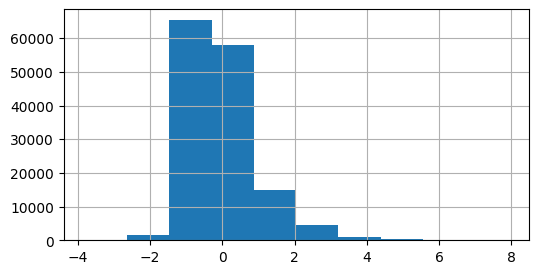

In [147]:
pd.Series(x_norm_no_out_re[:,3]).hist(figsize = (6,3))

<AxesSubplot:>

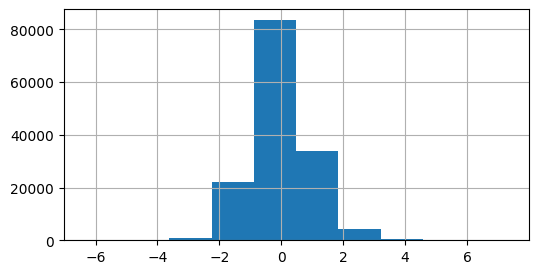

In [148]:
pd.Series(x_norm_no_out_re[:,4]).hist(figsize = (6,3))

## Label distribution

- Well distribution

In [165]:
y_16 = np.load('data_files/labels_All16.npy')

<AxesSubplot:>

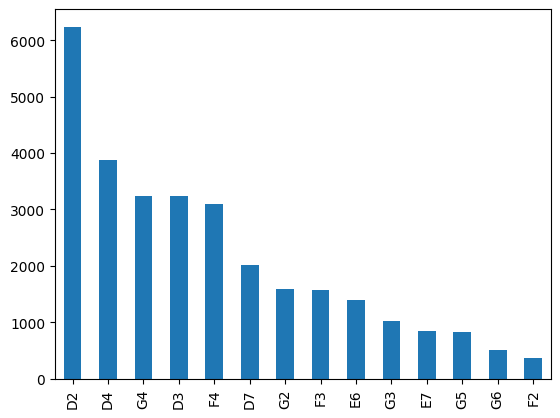

In [166]:
pd.Series(y_16).value_counts().plot.bar()

<AxesSubplot:>

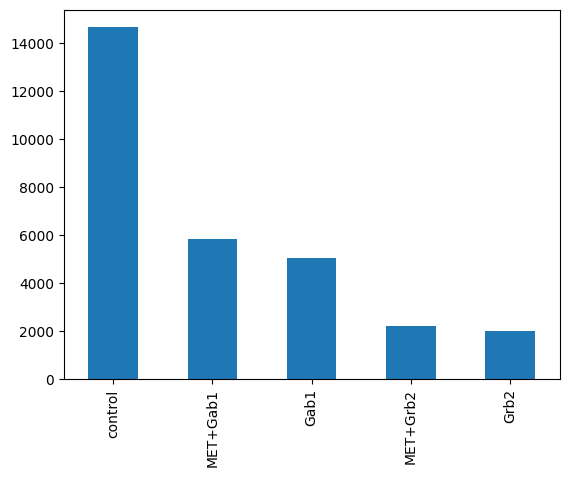

In [167]:
y2treat = pd.Series(y_16).map(wells_to_genetype_dict)
y2treat.value_counts().plot.bar()

In [17]:
y_no_out = y[no_outliers_idx]
y_no_out.shape

(4561,)

<AxesSubplot:>

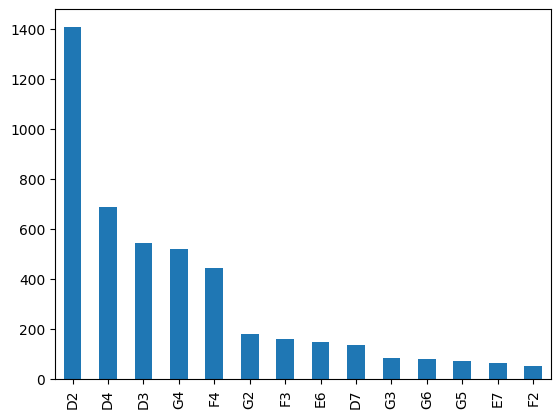

In [150]:
pd.Series(y_no_out).value_counts().plot.bar()

In [151]:
y2treat = pd.Series(y_no_out).map(wells_to_genetype_dict)

<AxesSubplot:>

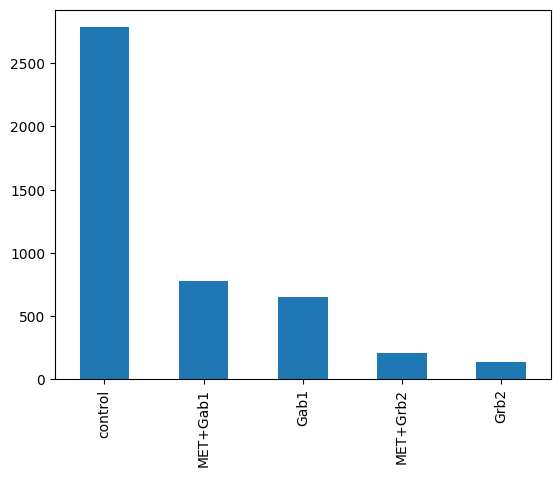

In [152]:
y2treat.value_counts().plot.bar()

In [163]:
pd.DataFrame(y2treat).groupby(0).size()

0
Gab1         651
Grb2         136
MET+Gab1     780
MET+Grb2     209
control     2785
dtype: int64

## Data Transformation

In [10]:
X_train = x_norm_no_out.copy()
traj = X_train[:,:,:2]
traj.shape

(4561, 32, 2)

In [11]:
displacement = np.sum(traj**2,axis=2)
displacement.shape

(4561, 32)

In [12]:
from tslearn.clustering import TimeSeriesKMeans
model = TimeSeriesKMeans(n_clusters=3, metric="dtw", max_iter=10)
model.fit(displacement)

TimeSeriesKMeans(max_iter=10, metric='dtw')

In [13]:
model.predict(displacement)

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4561 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [15]:
pd.Series(model.predict(displacement)).value_counts()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 4561 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


1    3118
0    1179
2     264
dtype: int64

In [16]:
neut1 = ['D2','D3','D4']
neut2 = ['G5','G6','G7']
gab1 = ['F2','F3','F4']
gab1_met = ['G2','G3','G4']
grb2 = ['D5','D6','D7']
grb2_met = ['E5','E6','E7']

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 2634 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

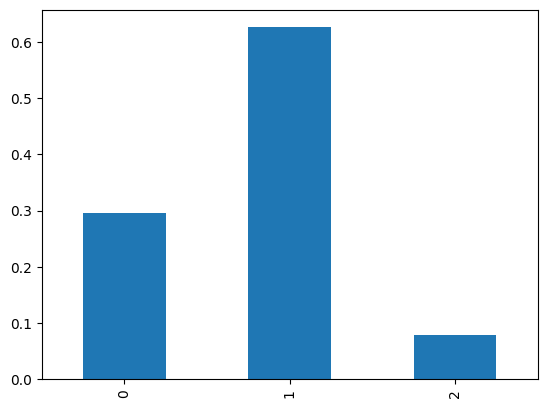

In [22]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,neut1))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 651 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

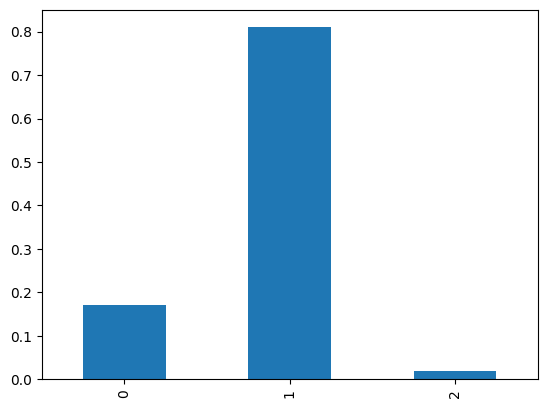

In [24]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,gab1))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 780 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

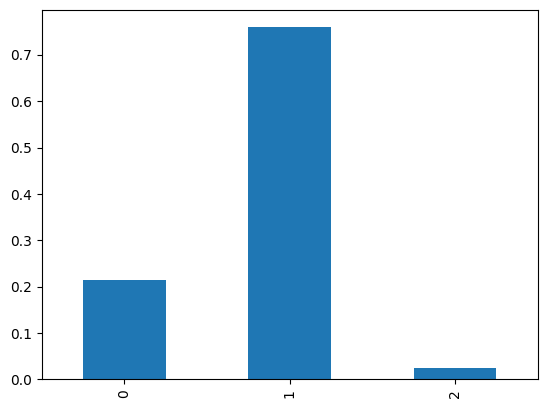

In [21]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,gab1_met))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 209 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


<AxesSubplot:>

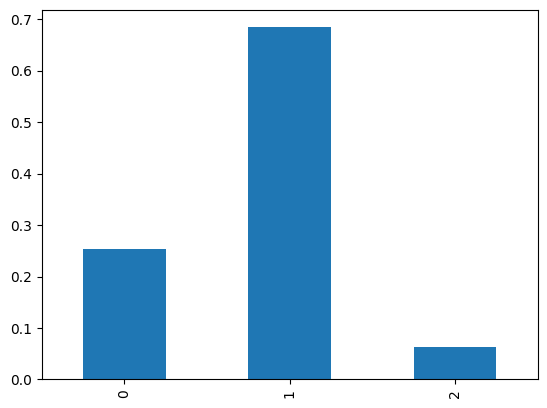

In [23]:
treat_well = model.predict(displacement[np.where(np.isin(y_no_out,grb2_met))])
pd.Series(treat_well).value_counts(normalize=True).sort_index().plot.bar()

## Representatives

In [ ]:
rep_list = []
size = 10
for i in range(n_clusters):
  cluster_vec = x[np.where(np.isin(y_pred,[i]))]
  cluster_list = cluster_vec[np.random.choice(cluster_vec.shape[0], size, replace=False)]
  rep_list.append(cluster_list)

plot_representatives(rep_list,figsize = (10,20))

In [39]:
x_s = np.array([[[0,0],[2,2],[2,2]] , [[0,0],[1,1],[2,2]] ,[[0,0],[3,3],[2,2]]])
x_s

array([[[0, 0],
        [2, 2],
        [2, 2]],

       [[0, 0],
        [1, 1],
        [2, 2]],

       [[0, 0],
        [3, 3],
        [2, 2]]])

In [36]:
d = np.diff(x_s,axis=1)
d

array([[[ 2,  2],
        [ 0,  0]],

       [[ 1,  1],
        [ 1,  1]],

       [[ 3,  3],
        [-1, -1]]])

In [44]:
np.sqrt((d ** 2).sum(axis=2))

array([[2.82842712, 0.        ],
       [1.41421356, 1.41421356],
       [4.24264069, 1.41421356]])